__Question I need answers for ->__ 

Q: Difference between sklearn.OHE and pandas.get_dummies ?

A: They are the same 

Q: Why does ticket prefix look like a very good predictor...as in it shows promise, a lot of ticket types got 1s or 0s... But the model ignores it ? (Decision Tree importance) 

A: frequency, every category should have approximately equal no of values to be considered...so if you specify a category with just 2 ppl in it .. it is considered as overfitting.. algorithm ignores such categories? <- Understand how decision tree algorithm works

<- check this answer..Self proclaimed asnwer

# Titanic Predictor

##### A Kaggle Data Set

In [55]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [56]:
test = pd.read_csv("Titanic Kaggle Data/test.csv")
train = pd.read_csv("Titanic Kaggle Data/train.csv")
sample_submission = pd.read_csv("Titanic Kaggle Data/gender_submission.csv")

In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### NOTE: 

Now, I will tend to read on Titanic and understand the data - 

1. https://en.wikipedia.org/wiki/RMS_Titanic
1. <a href='https://www.ultimatetitanic.com/the-voyage'><i>The route</i></a>

Something about the ticket makes me feel that there could feature engineering here... 



In [60]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling nan data 

In [62]:
for i in train.columns:
    print(train[i].isnull().value_counts())

False    891
Name: PassengerId, dtype: int64
False    891
Name: Survived, dtype: int64
False    891
Name: Pclass, dtype: int64
False    891
Name: Name, dtype: int64
False    891
Name: Sex, dtype: int64
False    714
True     177
Name: Age, dtype: int64
False    891
Name: SibSp, dtype: int64
False    891
Name: Parch, dtype: int64
False    891
Name: Ticket, dtype: int64
False    891
Name: Fare, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64
False    889
True       2
Name: Embarked, dtype: int64


__I need to deal with age and embarked__

In [63]:
#Handling Age variable
train['Age']=train['Age'].fillna(round(train[(train['Age'].notnull())]['Age'].mean()))

In [64]:
#Handling Embarking Null
train['Embarked']=train['Embarked'].fillna("Unknown")
test['Embarked']=train['Embarked'].fillna("Unknown")

In [65]:
#Chaning Cabin Data
train['Cabin'] = train['Cabin'].notnull().astype('int64')

In [66]:
train_clean = train.copy()

### Visualization

In [67]:
train_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


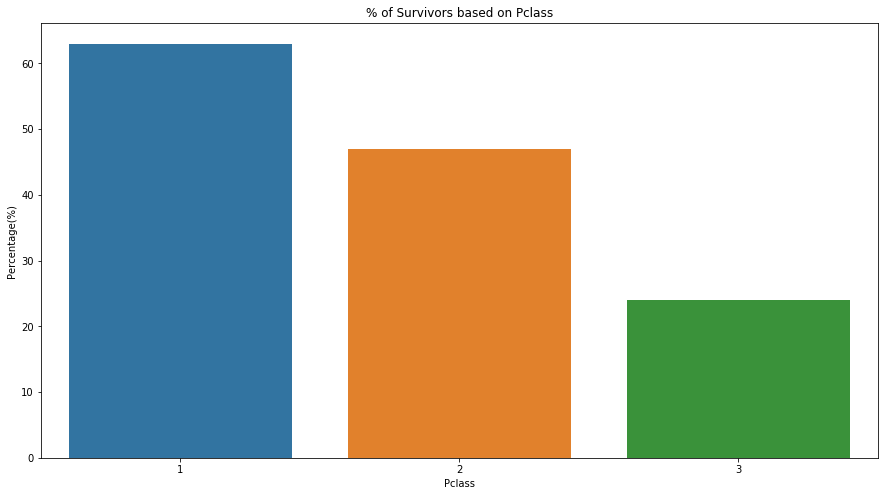

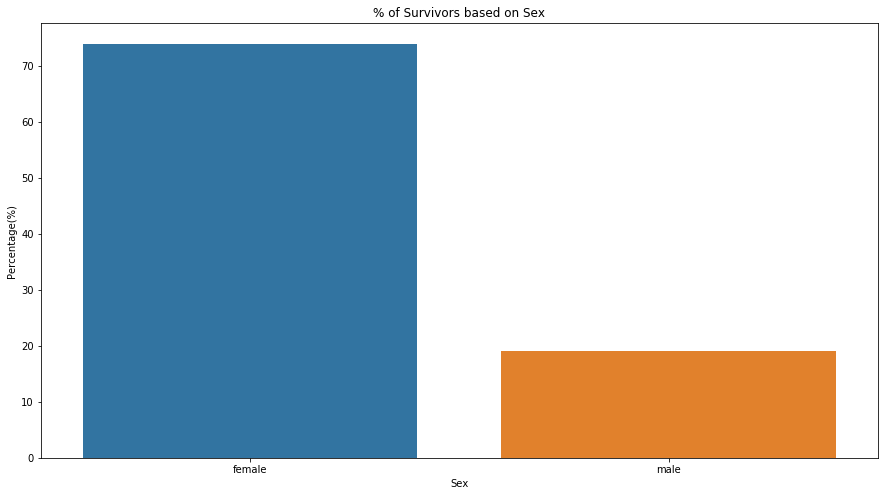

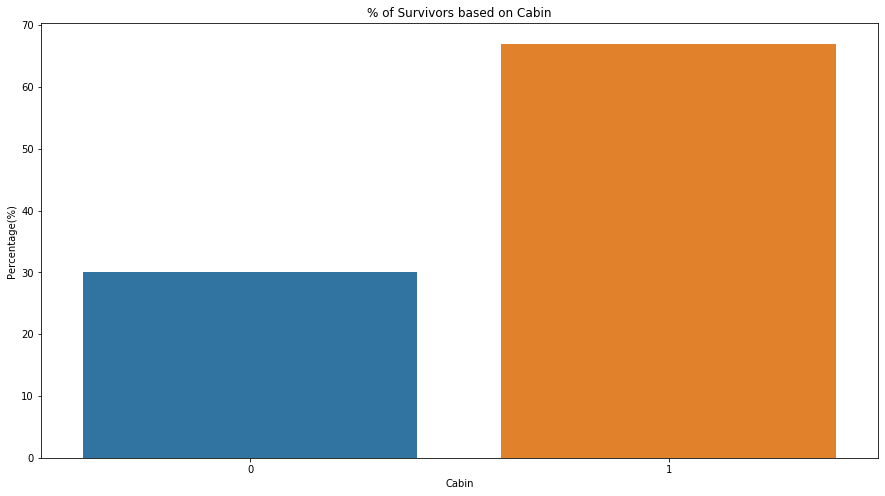

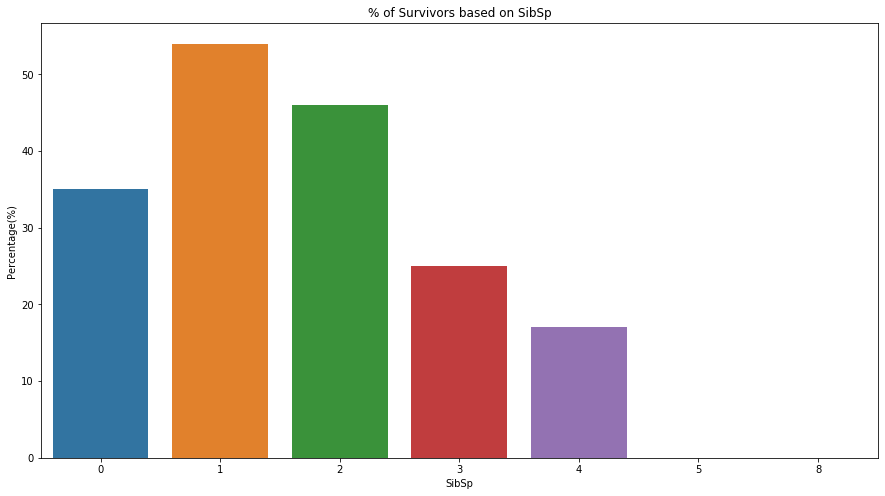

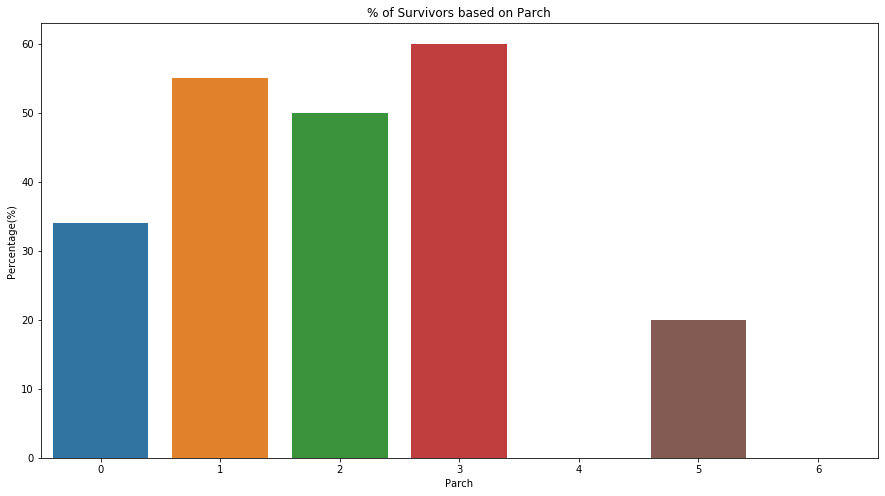

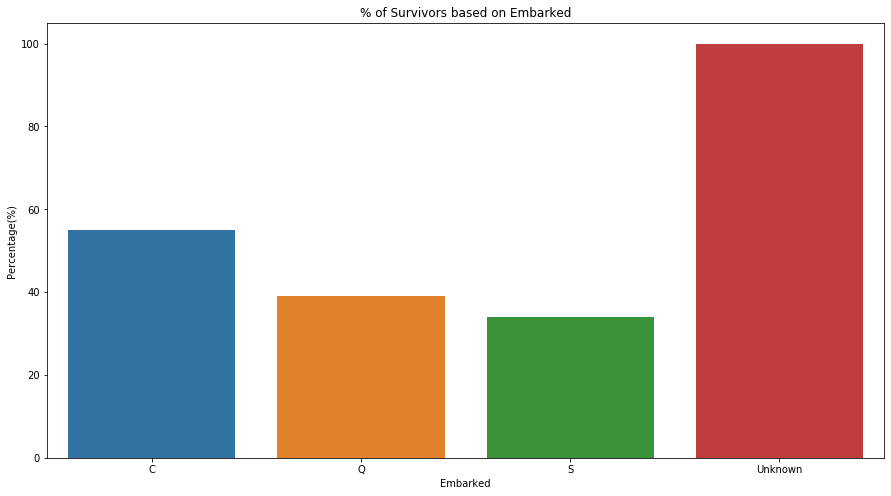

In [68]:
for i in ['Pclass','Sex','Cabin','SibSp','Parch','Embarked']:
    plot_data = pd.pivot_table(data=train_clean, index= i,values='Survived')*100
    plot_data = plot_data.round()

    plt.figure(figsize=(15,8))
    sns.barplot(data = plot_data,x=plot_data.index,y='Survived')

    plt.xlabel(i)
    plt.ylabel('Percentage(%)')
    plt.title('% of Survivors based on {}'.format(i))
    plt.show()
    print("\n\n\n")

### 8. Ticket Prefix 

In [128]:
train_clean['Ticket_prefix'] = train_clean['Ticket'].apply(lambda x: 'None' if(x.split(' ')[0].isdigit()) else x.split(' ')[0][0])
# train_clean['Ticket_prefix'] = train_clean['Ticket'].apply(lambda x: 0 if(x.split(' ')[0].isdigit()) else 1)

In [129]:
train_clean.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_prefix,Ticket_num,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,A,21171,19-27,1-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,P,17599,37-45,71-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,S,3101282,19-27,1-10


In [130]:
tic_num=[]
for x in train_clean['Ticket']:
    y=x.split(' ')
    if y[0]=='LINE':
        tic_num.append(0)
    elif y[0].isdigit():
        tic_num.append(y[0])
    else:
        tic_num.append(y[-1])

In [131]:
train_clean['Ticket_num']=tic_num

In [132]:
train_clean.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_prefix,Ticket_num,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,A,21171,19-27,1-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,P,17599,37-45,71-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,S,3101282,19-27,1-10


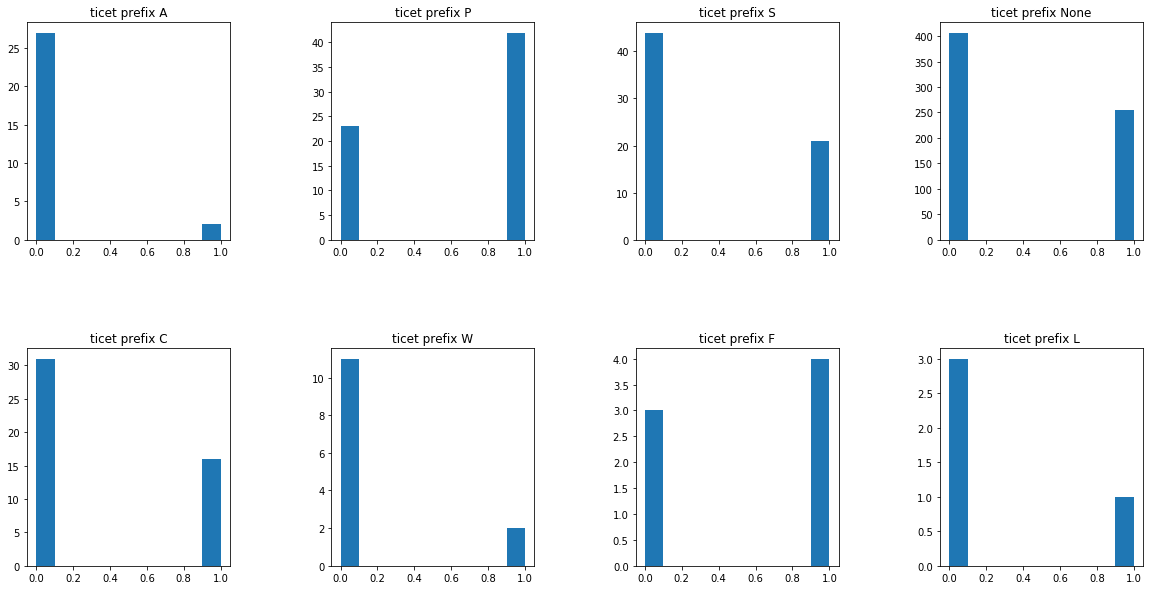

In [139]:
fig, axs = plt.subplots(2,4,figsize=(20,10))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in train_clean['Ticket_prefix'].unique():
    plot_data = train_clean[train_clean['Ticket_prefix']==i][['Ticket_prefix','Survived']]
    axs[counter].set_title('ticet prefix {}'.format(i))
    axs[counter].hist(x=plot_data['Survived'])
    counter+=1

We see amazing result from ticket prefix,  
* where some prefix result to 100% survivalibility
* some result to 0%
* some result to moderate 50%
* But we get distinctive results which can be used to predict better future :P

Let us furhter visualize

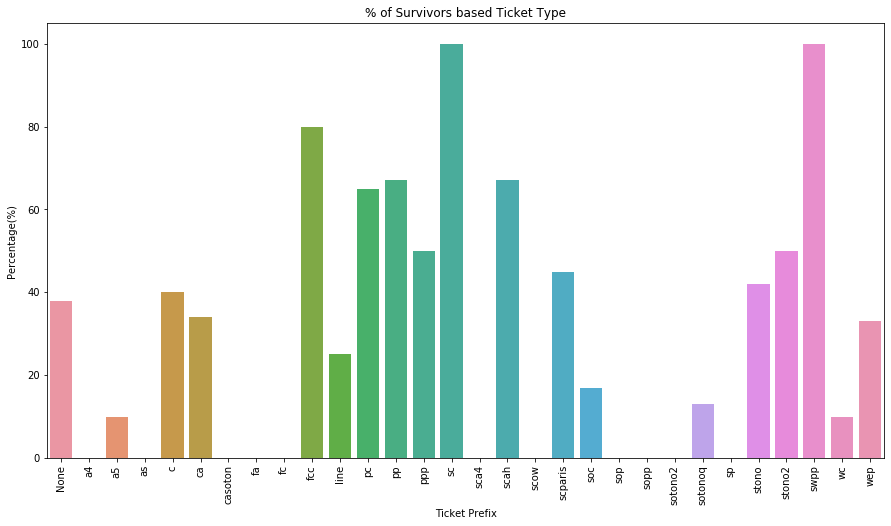

In [75]:
plot_data = pd.pivot_table(data=train_clean, index='Ticket_prefix',values='Survived')*100
plot_data = plot_data.round()

plt.figure(figsize=(15,8))
sns.barplot(data = plot_data,x=plot_data.index,y='Survived')

plt.xlabel('Ticket Prefix')
plt.ylabel('Percentage(%)')
plt.title('% of Survivors based Ticket Type')
plt.xticks(rotation=90)
plt.show()

### 9. Age Binning

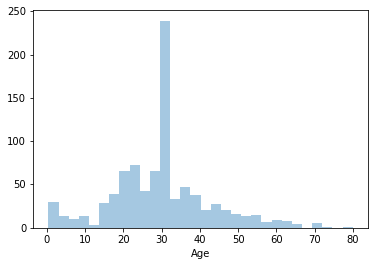

In [76]:
sns.distplot(train_clean['Age'], kde=False)
plt.show()

In [77]:
bins=[i*9 for i in range(0,10)]
labels = ['1-9','10-18','19-27','28-36','37-45','46-54','55-63','64-72','73-81']
train_clean['Age_binned'] =pd.cut(train_clean['Age'],bins,labels=labels)
train_clean.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_prefix,Ticket_num,Age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,a5,21171,19-27
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,pc,17599,37-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,stono2,3101282,19-27


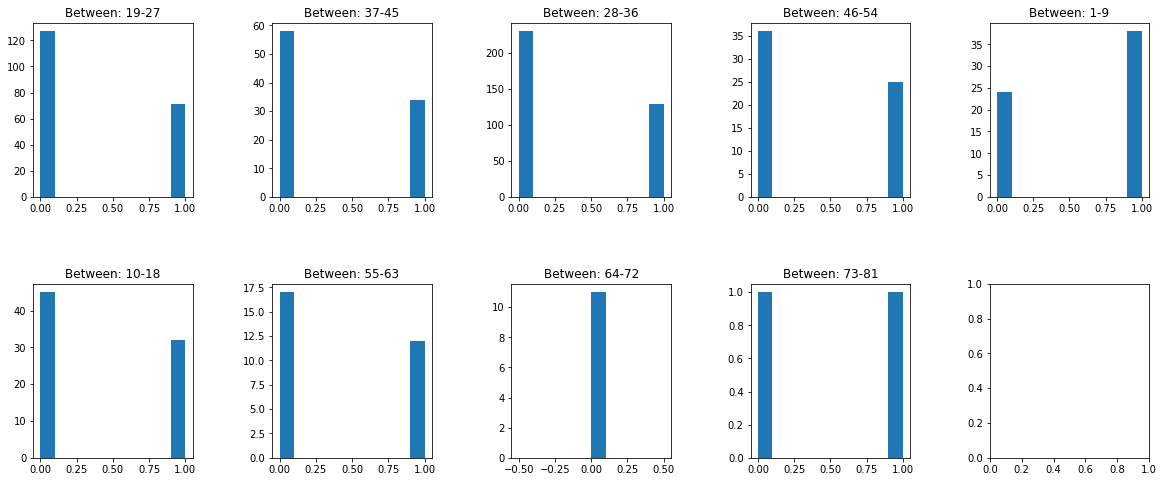

In [78]:
fig, axs = plt.subplots(2,5,figsize=(20,8))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in train_clean['Age_binned'].unique():
    plot_data = train_clean[train_clean['Age_binned']==i][['Age_binned','Survived']]
    axs[counter].set_title('Between: {}'.format(i))
    axs[counter].hist(x=plot_data['Survived'])
    counter+=1

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

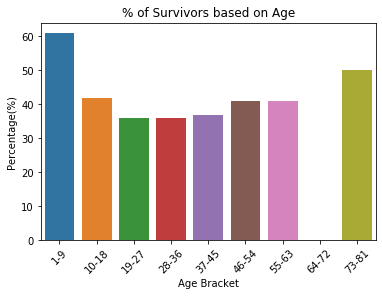

In [79]:
plot_data = pd.pivot_table(data=train_clean, index='Age_binned',values='Survived')*100
plot_data = plot_data.round()
sns.barplot(data = plot_data,x=plot_data.index,y='Survived')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage(%)')
plt.title('% of Survivors based on Age')
plt.xticks(rotation=45)

Age has lesser quatifiable impact in terms of regression....other than people above 60 did not survive

A decision tree type model will benefit more from this 

### 10. Fare Binning

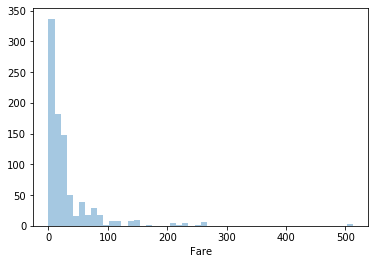

In [80]:
sns.distplot(train_clean['Fare'], kde=False)
plt.show()

In [81]:
bins=[i*10 for i in range(0,11)]
bins.append(520)
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','100+']
train_clean['Fare_binned'] =pd.cut(train_clean['Fare'],bins, labels=labels)
train_clean.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_prefix,Ticket_num,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,a5,21171,19-27,1-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,pc,17599,37-45,71-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,stono2,3101282,19-27,1-10


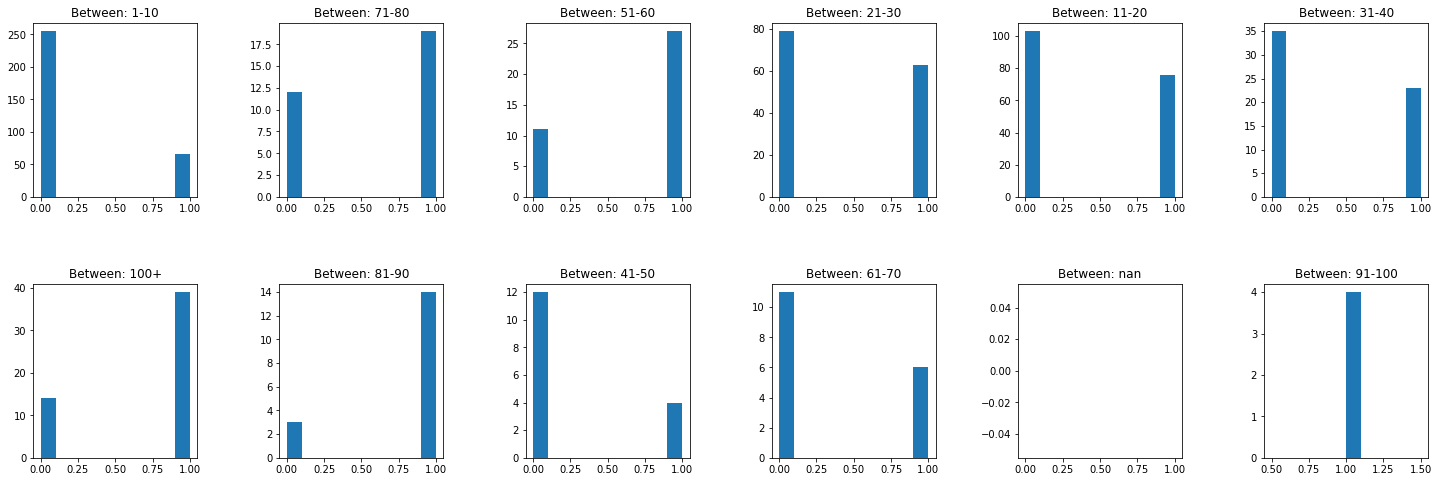

In [82]:
fig, axs = plt.subplots(2,6,figsize=(25,8))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in train_clean['Fare_binned'].unique():
    plot_data = train_clean[train_clean['Fare_binned']==i][['Fare_binned','Survived']]
    axs[counter].set_title('Between: {}'.format(i))
    axs[counter].hist(x=plot_data['Survived'])
    counter+=1

##### Notice
* __Ratio of dead:survived for Fare 0-70 > 1 (Anomaly exsists at Fare Bracket 50-60)__
* __Ratio of dead:survived for Fare 70+ < 1__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

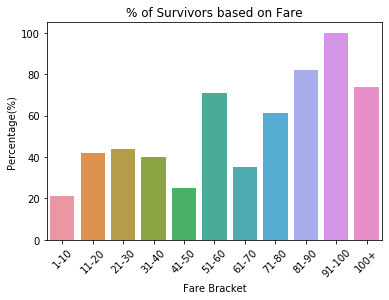

In [83]:
plot_data = pd.pivot_table(data=train_clean, index='Fare_binned',values='Survived')*100
plot_data = plot_data.round()
sns.barplot(data = plot_data,x=plot_data.index,y='Survived')
plt.xlabel('Fare Bracket')
plt.ylabel('Percentage(%)')
plt.title('% of Survivors based on Fare')
plt.xticks(rotation=45)

### Comparing Fare, Ticket_prefix and Survivability

In [84]:
pd.pivot_table(data=train_clean, index='Ticket_prefix', values=['Fare','Survived'], aggfunc={'Survived':['mean'],'Fare':['count','mean','median','min','max']}).sort_values(('Fare','mean'))

Fare                                          Survived
              count       max        mean   median      min      mean
Ticket_prefix                                                        
line              4    0.0000    0.000000   0.0000   0.0000  0.250000
fa                1    7.3125    7.312500   7.3125   7.3125  0.000000
sotono2           2    7.9250    7.525000   7.5250   7.1250  0.000000
sotonoq          15    8.0500    7.530000   7.2500   7.0500  0.133333
stono            12    7.9250    7.725000   7.9250   7.1250  0.416667
as                1    8.0500    8.050000   8.0500   8.0500  0.000000
sca4              1    8.0500    8.050000   8.0500   8.0500  0.000000
sp                1    8.1583    8.158300   8.1583   8.1583  0.000000
a5               21   16.1000    9.225395   8.0500   7.2500  0.095238
sopp              3   10.5000    9.516667  10.5000   7.5500  0.000000
c                 5   22.5250   10.123340   7.2500   6.4500  0.400000
swpp              2   10.5000   10.500000  10.5000  10.5000  1.000000
casoton           1   10.5000   10.500000  10.5000  10.5000  0.000000
stono2            6   15.8500   10.566667   7.9250   7.9250  0.500000
sc                1   12.0000   12.000000  12.0000  12.0000  1.000000
scow              1   12.2750   12.275000  12.2750  12.2750  0.000000
a4                7   24.1500   12.500000   8.0500   7.2500  0.000000
sop               1   12.5250   12.525000  12.5250  12.5250  0.000000
pp                3   16.7000   14.250000  16.7000   9.3500  0.666667
scah              3   26.0000   21.930567  26.0000  13.7917  0.666667
fcc               5   26.2500   22.050000  26.2500  10.5000  0.800000
wc               10   34.3750   22.345000  23.4500   7.5500  0.100000
ppp               2   24.0000   24.000000  24.0000  24.0000  0.500000
scparis          11   41.5792   27.014400  27.7208  12.8750  0.454545
None            661  263.0000   27.130899  13.0000   0.0000  0.384266
ca               41   69.5500   30.991463  26.2500   7.5500  0.341463
fc                1   52.0000   52.000000  52.0000  52.0000  0.000000
soc               6   73.5000   63.000000  73.5000  10.5000  0.166667
wep               3   71.0000   67.725000  71.0000  61.1750  0.333333
pc               60  512.3292  122.080483  79.2000  25.9250  0.650000

#### Repeat for test set

In [140]:
test['Ticket_prefix'] = test['Ticket'].apply(lambda x: 'None' if(x.split(' ')[0].isdigit()) else x.split(' ')[0][0])

In [141]:
tic_num=[]
for x in test['Ticket']:
    y=x.split(' ')
    if y[0]=='LINE':
        tic_num.append(0)
    elif y[0].isdigit():
        tic_num.append(y[0])
    else:
        tic_num.append(y[-1])
test['Ticket_num']=tic_num

In [142]:
bins=[i*9 for i in range(0,10)]
labels = ['1-9','10-18','19-27','28-36','37-45','46-54','55-63','64-72','73-81']
test['Age_binned'] =pd.cut(test['Age'],bins,labels=labels)

In [143]:
bins=[i*10 for i in range(0,11)]
bins.append(520)
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','100+']
test['Fare_binned'] =pd.cut(test['Fare'],bins,labels=labels)

In [144]:
test['Cabin'] = test['Cabin'].notnull().astype('int64')

In [145]:
train_clean.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_prefix,Ticket_num,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,A,21171,19-27,1-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,P,17599,37-45,71-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,S,3101282,19-27,1-10


In [146]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_prefix,Ticket_num,Age_binned,Fare_binned
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1,S,None,330911,28-36,1-10
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1,C,None,363272,46-54,1-10
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1,S,None,240276,55-63,1-10


In [147]:
train_clean.to_csv("train_clean.csv")
test.to_csv("test_clean.csv")